<a href="https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch?scriptVersionId=112497450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Beta of the security measures how the given security performs in comparision to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,
1. $\beta = 0$ No relation to the market (i.e S&P500)
2. $\beta = 1$ Performs same as the market
3. $\beta < 1$ Lose less in recession and makes less in flourishing economy
4. $\beta > 1$ Lose more in recession and makes more in flourinshing economy
5. $\beta < 0$ Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa.

We shall, try to find Beta for tesla. To find beta one usually, considers last 5 year data with monthly period.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import pandas_datareader as web

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

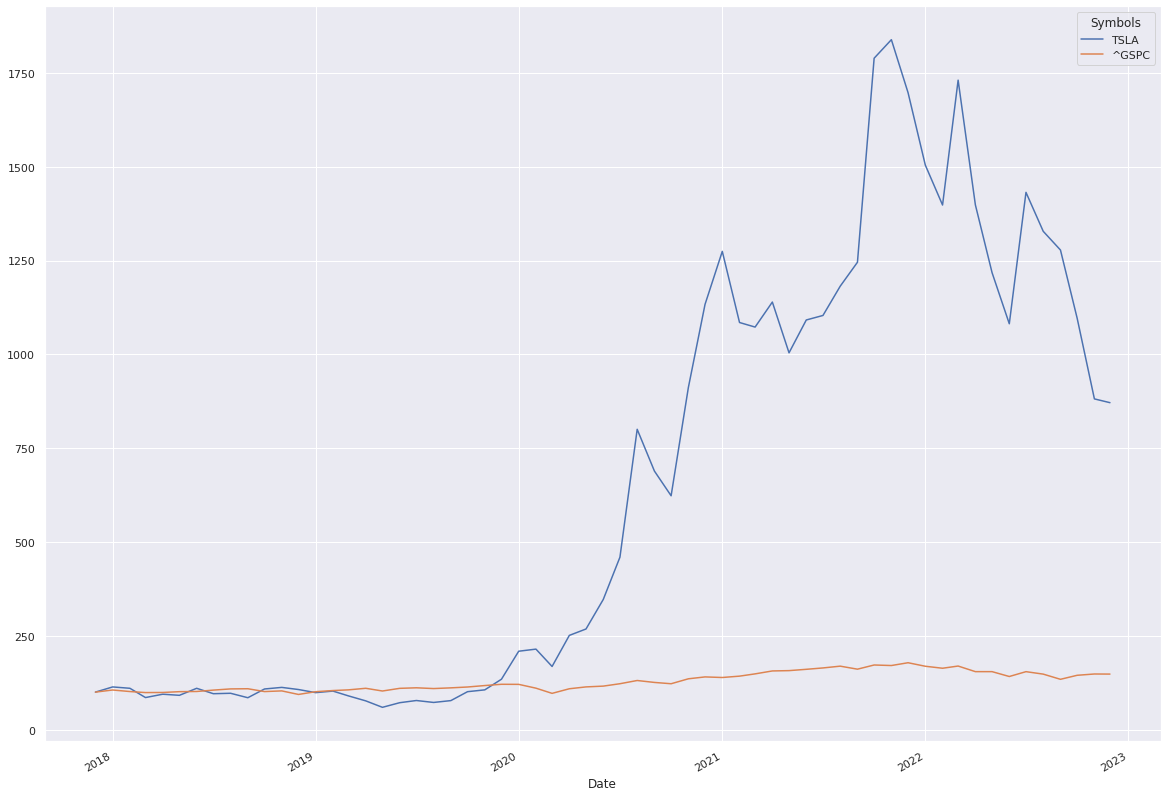

In [2]:
stocks = 'TSLA ^GSPC'.split()
df = web.get_data_yahoo(stocks, start=dt.today() - td(days=365*5), 
                       interval='m')['Adj Close']
(df * 100 / df.iloc[0]).plot(figsize=(20,15));

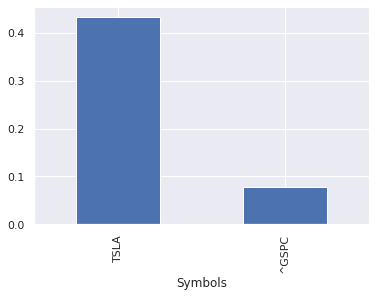

In [3]:
df_return = np.log(df / df.shift())
(df_return.mean() * 12).plot.bar();

TSLA is about 44% annual return, while S&P is about 8%, so we expect beta is more than 1.

$$\beta = \frac{\textit{Cov}(TSLA, S\& P)}{\textit{Var}(S\& P)}$$

In [4]:
cov = df_return.cov() * 12
cov

Symbols,TSLA,^GSPC
Symbols,,
TSLA,0.418175,0.059116
^GSPC,0.059116,0.033982


In [5]:
market_cov = cov.iloc[0,1]
var_market = cov.iloc[1,1]
beta_tsla = market_cov / var_market
print(f'Beta (5Y period) of TSLA is : {beta_tsla}')

Beta (5Y period) of TSLA is : 1.739656629575288


In [6]:
def get_beta(stock, start=dt.today() - td(days=365*5)):
    df = web.get_data_yahoo([stock, '^GSPC'], start=start, interval='m')['Adj Close']
#     (df * 100 / df.iloc[0]).plot(figsize=(20,15))
    
    df_return = np.log(df / df.shift())
    (df_return.mean() * 12).plot.bar()
    plt.title(f'Annual log return of {stock.upper()}')
    cov = df_return.cov() * 12
    market_cov = cov.iloc[0,1]
    var_market = cov.iloc[1,1]
    beta = market_cov / var_market
#     print(f'Beta (5Y period) of {stock.upper()} is : {beta}')
    return beta
    

0.4019198192069013

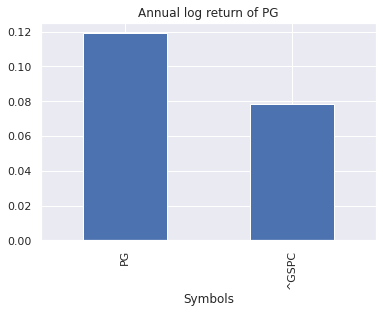

In [7]:
get_beta('PG')

1.739656629575288

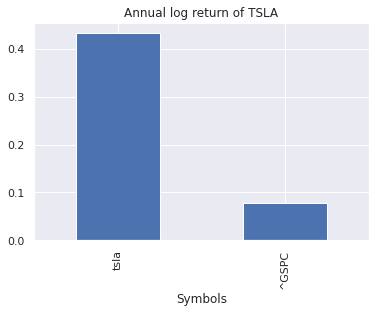

In [8]:
get_beta('tsla')

One can always google Beta value and one can see that it will be nearby.  

# Capital Asset Pricing Model (CAPM)

Return of investement = Risk-Free Return + $\beta \cdot $(Market Return - Risk-Free Return)

- (Market Return - Risk-Free Return) is called Market risk premium. Market research tell that this value is about 5 %
- Risk-Free Return is about 2.5 %

Let us calculate the return for TSLA.

In [9]:
def get_return(stock, start=dt.today() - td(days=365*5), risk_premium=5, risk_free=1.38):
    beta = get_beta(stock, start)
    # risk_premium = market return - risk free return
    result = risk_free + beta * risk_premium
    print(f'Expected return for {stock.upper()} is {result} %\n')
    return result

Expected return for PG is 3.3895954625973923 %



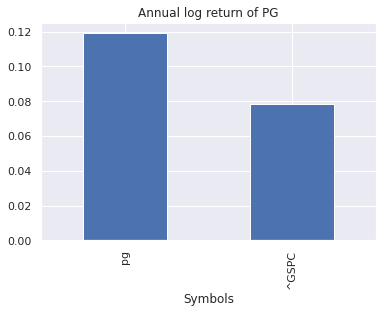

In [10]:
ret = get_return('pg')

Expected return for TSLA is 10.07828314787644 %



10.07828314787644

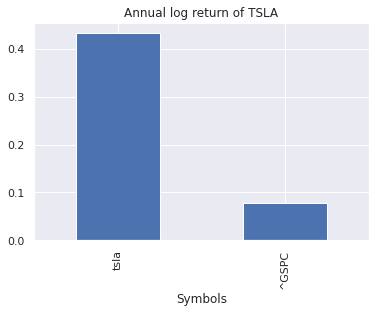

In [11]:
get_return('tsla')

In [12]:
df.iloc[0,0]

20.75666618347168

# Sharpe Ratio (SR)

$$ SR = \Large\frac{r_i - r_f}{\sigma_i}, $$ 
- $r_i$ : Stock i return
- $r_f$ : Risk Free return
- $\sigma_i$ : Stock i std


In [13]:
def get_sharpe(stock, start=dt.today()-td(365*5)):
    pg = web.get_data_yahoo(stock,start=start)['Adj Close']
    pg_ret = np.log(pg / pg.shift())
    ri = get_return(stock)
    rf = 2.5 / 100
    sigma = pg_ret.std() * 250 ** .5

    sr = (ri - rf) / sigma
    print(f'Sharpe Ratio of {stock.upper()} is : {sr}')
    return sr, ri

Expected return for AMZN is 7.3570667552926405 %

Sharpe Ratio of AMZN is : 20.697267434483074


(20.697267434483074, 7.3570667552926405)

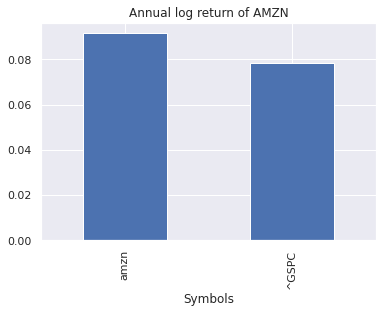

In [14]:
get_sharpe('amzn')

Expected return for PG is 3.3895977428110733 %

Sharpe Ratio of PG is : 15.485687982732076


(15.485687982732076, 3.3895977428110733)

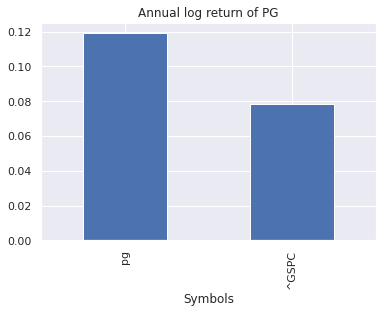

In [15]:
get_sharpe('pg')